In [8]:
import numpy as np
import pandas as pd
import os
from csv import QUOTE_NONE
from glob import glob
from tqdm import tqdm

In [62]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv("numerical_data.csv")

In [35]:
df["log(Retweets)"] = np.log(df["Retweets"])

c:\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
order = np.log10(len(df))

In [60]:
def train(data, model):
    model.fit(*data)
    return model

def overall_regressor_model(X, clf, rgr) -> np.array:
    retweeted = clf.predict(X)    
    retweeted_indices = np.argwhere(retweeted > 0)    
    retweeted_indices = retweeted_indices.ravel()
    
    numRetweets = rgr.predict(X[retweeted_indices,:])
    numRetweets = np.exp(numRetweets)
    
    retweeted = retweeted.astype(float)
    for index, numRetweet in zip(retweeted_indices, numRetweets):
        retweeted[index] = numRetweet
    return retweeted

def evaluate(data, clf, rgr) -> float:
    X, y = data
    y_hat = overall_regressor_model(X, clf, rgr)
#     [print(i) for i in zip(y, y_hat)]
    diff = y - y_hat
    return diff.dot(diff) / len(diff)

def MinMaxNormalize(*args):
    m = MinMaxScaler()
    return (m.fit_transform(arg) for arg in args)

In [61]:
training_size = list()
MSE = list()
for power in tqdm(range(1, int(order))):
    data = df#.sample(10**power, random_state = 42)

    data["log(Retweets)"] = np.log(data["Retweets"])
    y_clf = data["Retweeted"].copy()
    y_rgr = data["log(Retweets)"].copy()
    #     y = data["Retweets"]
    #     retweeted = data["Retweeted"] > 0
    data.drop(columns=["Retweeted", "Retweets", "log(Retweets)"], inplace=True)
    X = MinMaxScaler().fit_transform(data)


    X_train, X_test, y_clf_train, y_clf_test, y_rgr_train, y_rgr_test = train_test_split(X, y_clf, y_rgr, random_state=42)

    training_set_size = len(X_train)
    training_size.append(training_set_size)


    clf_model = RandomForestClassifier(max_depth=2, random_state=0)
    rgr_model = RandomForestRegressor(max_depth=2, random_state=0)

    clf = train((X_train, y_clf_train), clf_model)
    rgr = train((X_train[y_clf_train > 0], y_rgr_train[y_clf_train > 0]), rgr_model)



    mse = evaluate((X_test, np.exp(y_rgr_test)), clf, rgr)
    MSE.append(mse)

    
print(training_size)
print(MSE)



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]c:\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 17%|██████████████                                                                      | 1/6 [00:01<00:06,  1.24s/it]c:\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 33%|████████████████████████████                                                        | 2/6 [00:02<00:04,  1.19s/it]c:\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 50%|██████████████████████████████████████████                                          | 3/6 [00:03<00:03,  1.22s/it]c:\python39\lib\site-packages\panda

[7, 75, 750, 7500, 75000, 750000]
[5909.614679493093, 48313.99715903848, 61555.79182545117, 617450.073707963, 25380177.344989493, 6557427.8697125055]


<AxesSubplot:ylabel='Frequency'>

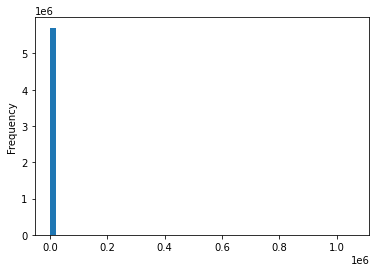

In [82]:
# plt.hist(df["Retweets"])
df[df["Retweets"]>10]["Retweets"].plot(kind="hist", bins=50)

<AxesSubplot:ylabel='Frequency'>

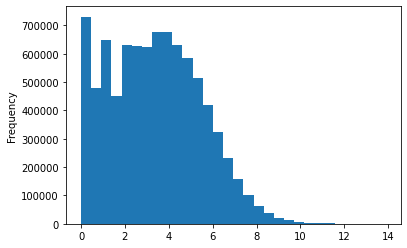

In [78]:
df[df["Retweets"]>0]["log(Retweets)"].plot(kind="hist", bins=30)

Text(0, 0.5, 'MSE Loss')

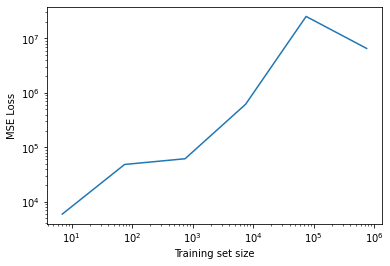

In [83]:
plt.loglog(training_size, MSE)
plt.xlabel("Training set size")
plt.ylabel("MSE Loss")